___

# WELCOME!

___

Welcome to the "***Sentiment Analysis and Classification***" study.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this study is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

We will build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, let's take a look at the Determines and Tasks.

## Determines

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if we want, we can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, we can start to know the data after doing the import and load operations. 
We need to do missing value detection for Review Text, which is the only variable we need to care about. We can drop other variables.

We will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, we will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, we will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---

## Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---

# Sentiment analysis of women's clothes reviews


In this study we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

### Some Useful User Defined Functions

In [3]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
# df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [5]:
df = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [6]:
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                    Title  \
23481                      Great dress for many occasions   
23482                          Wish it was made of cotton   
23483                               Cute, but see through   
23484  Very cute dress, perfect for summer parties and we   
23485                     Please make more like this one!   

                                                                                                                                                                                                   Review Text  \
23481                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
23483  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
23484  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
23485                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
23481       5                1                        0  General Petite   
23482       3                1                        0  General Petite   
23483       3                0                        1  General Petite   
23484       3                1                        2         General   
23485       5                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [7]:
df.sample(5)

Unnamed: 0  Clothing ID  Age                              Title  \
7491         7491          968   49                        Dreamy vest   
17687       17687         1114   36  I expected color to be different.   
17459       17459         1119   38         Great idea..poor execution   
1679         1679          964   33                            Perfect   
15880       15880         1081   50             Lovely and flattering!   

                                                                                                                                                                                                   Review Text  \
7491                                                                                 The vest looks  so stylish on. it makes a regular t shirt look edgy with it on. i love the vest but the price is too high   
17687  This coat is beautifully made and for $800 i expect no less. however, i should have checked other resources prior to buying. the color on this website is nothing like actual color of coat. i was e...   
17459  I tried on an xs and it was boxy/roomy in the torso and the pocket on the wrist/forearm area made my arm look too bulky when i rolled the sleeves up like the model pictured. i love the idea of a r...   
1679   I love this vest. get compliments every time i wear it. it's stretchy too :). unfortunately i got ranch dressing on it and spot treated it with shout and now the spot is gone but the color faded t...   
15880  I really liked this dress. it's so comfy, i could sleep in it plus it's quite flattering. however, if you have a tummy, which i do, you have to really suck it in. the dress will show bulges but th...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
7491        3                1                        0         General   
17687       4                1                        4         General   
17459       1                0                        0         General   
1679        5                1                        0  General Petite   
15880       4                1                        9  General Petite   

      Department Name Class Name  
7491          Jackets    Jackets  
17687         Jackets  Outerwear  
17459         Jackets  Outerwear  
1679          Jackets    Jackets  
15880         Dresses    Dresses

### Data Wrangling

In [8]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [9]:
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

- The "Unnamed:_0" column contains completely unique values and contains the same information as the index. Alsa "clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [10]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [11]:
df.shape

(23486, 9)

In [12]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [13]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000

- Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric. 

In [14]:
df.describe(include=object).T

count unique  \
title        19676  13993   
review_text  22641  22634   
division     23472      3   
department   23472      6   
class        23472     20   

                                                                                            top  \
title                                                                                  Love it!   
review_text  Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
division                                                                                General   
department                                                                                 Tops   
class                                                                                   Dresses   

              freq  
title          136  
review_text      3  
division     13850  
department   10468  
class         6319

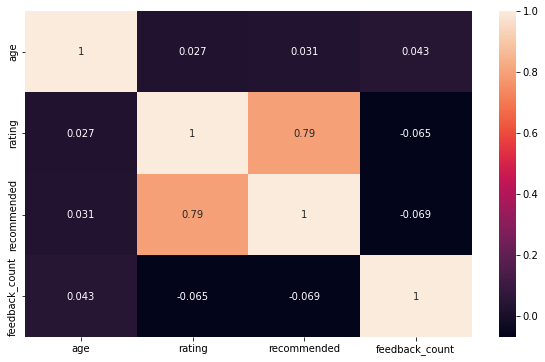

In [15]:
sns.heatmap(df.corr(), annot=True);

- Let us have look at the columns remaining in the dataset.

In [16]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

***age***
- Positive Integer variable of the reviewers age.

In [17]:
first_look("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
40     617
44     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
19      40
73      40
75      26
77      18
78      15
79      15
82      13
76      10
80      10
85       6
84       6
89       5
81       5
91       5
18       4
87       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: age, dtype: int64


In [18]:
df.age.describe().T

count   23486.000
mean       43.199
std        12.280
min        18.000
25%        34.000
50%        41.000
75%        52.000
max        99.000
Name: age, dtype: float64

In [19]:
px.histogram(df, x = df.age)

In [20]:
pd.crosstab(df.age, df.recommended).iplot(kind="bar")

***rating*** 
- Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [21]:
first_look("rating")

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [22]:
df.rating.describe().T

count   23486.000
mean        4.196
std         1.110
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: rating, dtype: float64

In [23]:
px.histogram(df, x = df.rating)

In [24]:
pd.crosstab(df.rating, df.recommended).iplot(kind="bar")

***recommended*** 
- Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [25]:
first_look("recommended")

column name    :  recommended
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: recommended, dtype: int64


In [26]:
df.recommended.describe().T

count   23486.000
mean        0.822
std         0.382
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: recommended, dtype: float64

In [27]:
px.histogram(df, x = df.recommended)

***feedback_count:***
- Positive Integer documenting the number of other customers who found this review positive.

In [28]:
first_look("feedback_count")

column name    :  feedback_count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
35         6
36         6
33         6
51         5
81         4
45         4
39         4
65         4
43         4
40         3
47         3
57         3
41         3
44         3
53         2
49         2
46         2
58         2
55         2
64         1
89         1
68         1
56         1
48         1
98         1
93         1
95         1
50         1
99         1
87         

In [29]:
df.feedback_count.describe().T

count   23486.000
mean        2.536
std         5.702
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       122.000
Name: feedback_count, dtype: float64

In [30]:
px.histogram(df, x = df.feedback_count)

In [31]:
pd.crosstab(df.feedback_count, df.recommended).iplot(kind="bar")

***division*** 
- Categorical name of the product high level division.

In [32]:
first_look("division")

column name    :  division
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: division, dtype: int64


In [33]:
df.division.describe().T

count       23472
unique          3
top       General
freq        13850
Name: division, dtype: object

In [34]:
px.histogram(df, x = df.division)

In [35]:
pd.crosstab(df.division, df.recommended).iplot(kind="bar")

***department***
- Categorical name of the product department name

In [36]:
first_look("department")

column name    :  department
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: department, dtype: int64


In [37]:
df.department.describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department, dtype: object

In [38]:
px.histogram(df, x = df.department)

In [39]:
pd.crosstab(df.department, df.recommended).iplot(kind="bar")

***class***
- Categorical name of the product class name.

In [40]:
first_look("class")

column name    :  class
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


In [41]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

In [42]:
px.histogram(df, x = df["class"])

In [43]:
pd.crosstab(df["class"], df.recommended).iplot(kind="bar")

***title*** 
- String variable for the title of the review.

In [44]:
first_look("title")

column name    :  title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
NaN                                        3810
Love it!                                    136
Beautiful                                    95
Love                                         88
Love!                                        84
                                           ... 
Not for my body                               1
Perfect transition dress                      1
The perfect spring dress!                     1
Super soft but can make you look frumpy       1
Please make more like this one!               1
Name: title, Length: 13994, dtype: int64


In [45]:
df.title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: title, dtype: object

***review_text*** 
- String variable for the review body.

In [46]:
first_look("review_text")

column name    :  review_text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                   

In [47]:
df.review_text.describe().T

count                                                                                  22641
unique                                                                                 22634
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq                                                                                       3
Name: review_text, dtype: object

#### Check Proportion of Target Class Variable:

In [48]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommended".

1    19314
0     4172
Name: recommended, dtype: int64


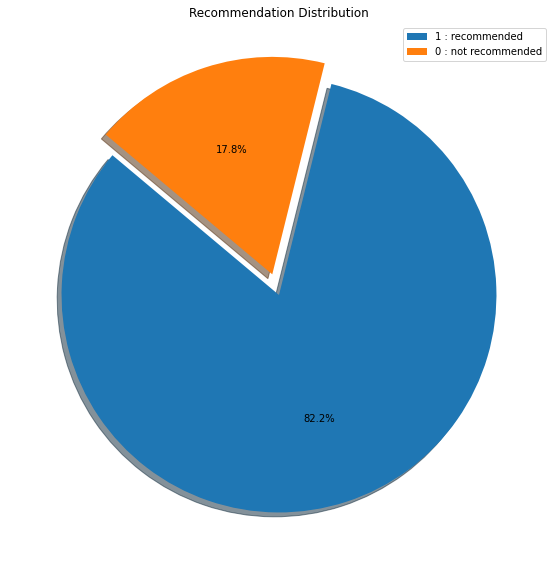

In [49]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame we will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. We can do the missing value detection operations from now on. We can also rename the column names if we want.

### Feature Selection and Rename Column Name

In [50]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [51]:
df_ml = df.copy()

# df_ml = df[['review_text', 'recommended']].copy()

In [52]:
drop_columns = ['age', 
                'title', 
                'rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [53]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [55]:
df_ml.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [56]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [57]:
missing_values(df_ml)

Missing_Number  Missing_Percent
text             845            0.036

In [58]:
df_ml.isnull().melt(value_name="missing")

variable  missing
0           text    False
1           text    False
2           text    False
3           text    False
4           text    False
...          ...      ...
46967  recommend    False
46968  recommend    False
46969  recommend    False
46970  recommend    False
46971  recommend    False

[46972 rows x 2 columns]

<Figure size 720x360 with 0 Axes>

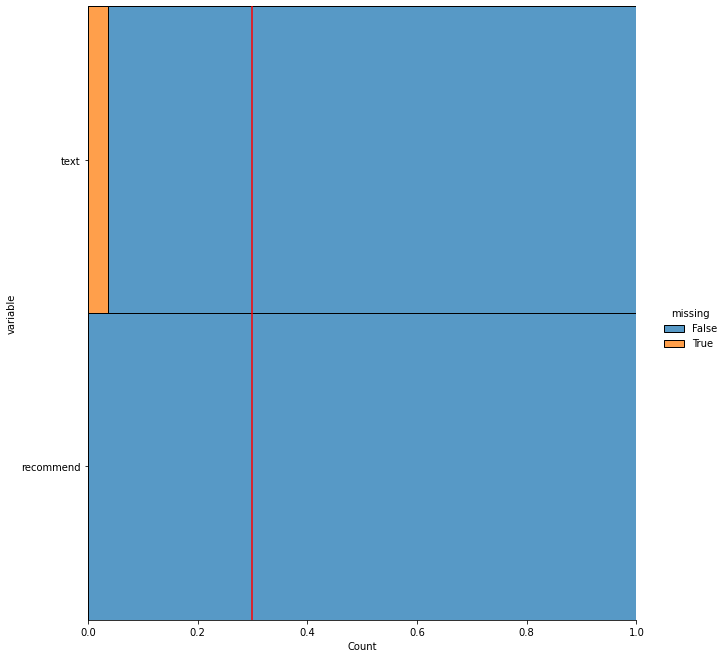

In [59]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [60]:
df_ml = df_ml.dropna()

# df_ml = df_ml.dropna(subset=['text'], axis=0)
# df_ml = df_ml.reset_index(drop=True)

In [61]:
missing_values(df_ml)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [63]:
df_ml["text"].str.isspace().sum()
df_ml[df_ml["text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 

### Tokenization, Noise Removal, Lexicon Normalization

In [64]:
df_ml.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [65]:
stop_words = stopwords.words('english')

In [66]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [67]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

### Rare Words

In [68]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [69]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

dress         11337
fit           10122
size           9360
love           8979
top            8273
              ...  
backpacker        1
necessa           1
creamish          1
redish            1
platinum          1
Length: 11990, dtype: int64

In [70]:
rare_words = rare_words[rare_words <= 2] 

In [71]:
rare_words.index

Index(['wrestling', 'vpl', 'sentence', 'err', 'jasper', 'prado', 'skipping',
       'arc', 'whip', 'diminish',
       ...
       'lthink', 'attrac', 'asthetically', 'clin', 'amsterdam', 'backpacker',
       'necessa', 'creamish', 'redish', 'platinum'],
      dtype='object', length=6498)

In [72]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We will create separate word clouds for positive and negative reviews. We can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [73]:
df_ml[df_ml["recommend"] == 0].head(3)

text  \
2   high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
5   love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...   
10       dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   

    recommend  
2           0  
5           0  
10          0

In [74]:
df_ml[df_ml["recommend"] == 1].head(3)

text  \
0                                                                                                                                           absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                              love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   

   recommend  
0          1  
1          1  
3          1

### Collect Words (positive and negative separately)

In [75]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [76]:
positive_words =" ".join(df_ml[df_ml["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [77]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [78]:
len(positive_words)

516406

In [79]:
len(negative_words)

116392

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [80]:
review_text = df_ml["text"]

In [81]:
all_words = " ".join(review_text)

In [82]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

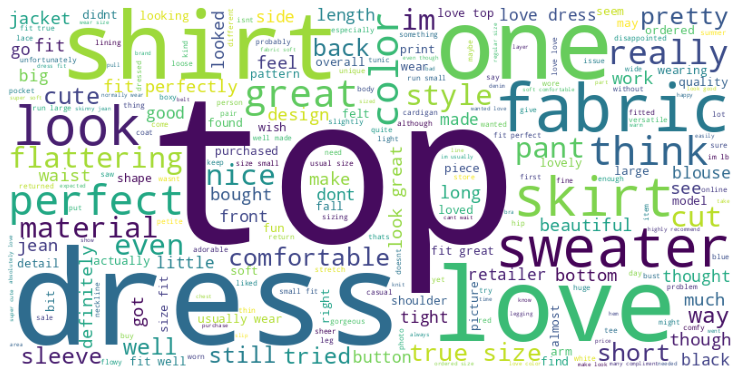

In [83]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

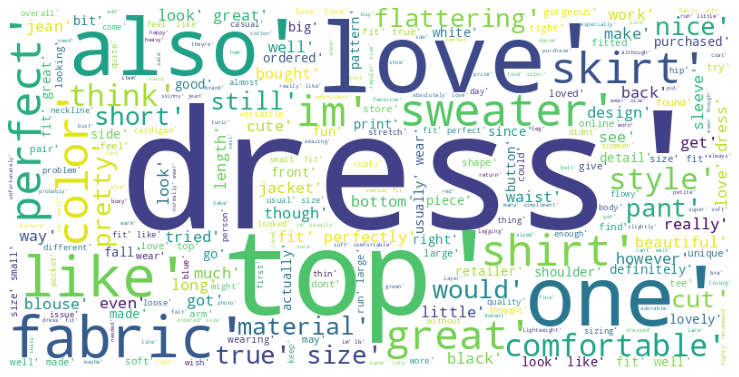

In [84]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

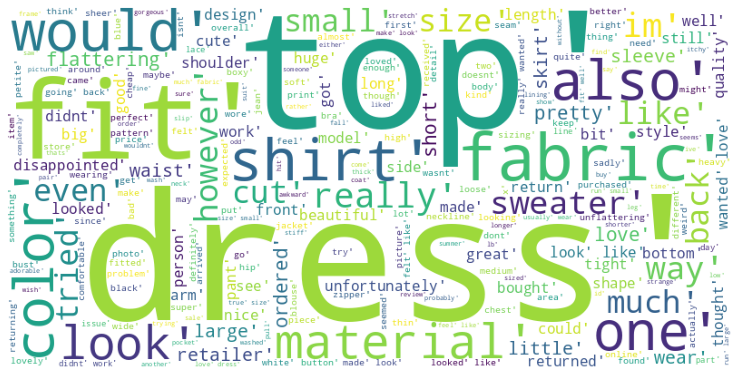

In [85]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting words

In [86]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11337),
 ('fit', 10122),
 ('size', 9360),
 ('love', 8979),
 ('top', 8273),
 ('like', 7032),
 ('color', 6908),
 ('look', 6886),
 ('wear', 6520),
 ('great', 6095),
 ('im', 5965),
 ('would', 5013),
 ('fabric', 4860),
 ('small', 4583),
 ('really', 3923),
 ('ordered', 3833),
 ('little', 3772),
 ('perfect', 3754),
 ('one', 3702),
 ('flattering', 3484),
 ('soft', 3317),
 ('well', 3245),
 ('back', 3183),
 ('comfortable', 3044),
 ('cute', 3029),
 ('nice', 3016),
 ('bought', 2986),
 ('beautiful', 2948),
 ('bit', 2877),
 ('material', 2810),
 ('shirt', 2789),
 ('large', 2789),
 ('much', 2703),
 ('sweater', 2699),
 ('length', 2637),
 ('run', 2627),
 ('jean', 2593),
 ('also', 2581),
 ('work', 2526),
 ('petite', 2430),
 ('got', 2424),
 ('long', 2399),
 ('short', 2360),
 ('waist', 2306),
 ('quality', 2256),
 ('medium', 2231),
 ('skirt', 2218),
 ('think', 2194),
 ('pretty', 2187),
 ('even', 2163)]

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps we will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

After performing data preprocessing, we will build our models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [87]:
X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [91]:
X_train_count

<18112x5461 sparse matrix of type '<class 'numpy.int64'>'
	with 459040 stored elements in Compressed Sparse Row format>

In [92]:
X_test_count

<4529x5461 sparse matrix of type '<class 'numpy.int64'>'
	with 114037 stored elements in Compressed Sparse Row format>

In [93]:
len(X_train_count.toarray())

18112

In [94]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
len(X_test_count.toarray())

4529

In [96]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           1   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
18107   0   0     0        0        0     0    0         0           0   
18108   0   0     0        0        0     0    0         0           0   
18109   0   0     0        0        0     0    0         0           0   
18110   0   0     0        0        0     0    0         0           1   
18111   0   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
18107           0         0       0    0          0   0       0         0   
18108           0         0       0    0          0   0       0         0   
18109           0         0       0    0          0   0       0         0   
18110           0         0       0    0          0   0       0         0   
18111           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
18107           0            0            0             0       0           0   
18108           0            0            0             0       0           0   
18109           0            0            0             0       0           0   
18110           0            0            0             0       0           0   
18111           0            0            0             0       0           0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3           0            0             0              0          0         0   
4           0            0             0              0          0         0   
...       ...          ...           ...            ...        ...       ...   
18107       0            0             0              0          0         0   
18108       0            0             0              0          0         0   
18109       0            0             0              0          0         0   
18110       0            0             0              0          0         0   
18111       0            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0               0             0            0             0              0   
1               0             0            0             0              0   
2               0           

In [98]:
X_train

array(['love gorgeous shade unflattering skintone make look version tied dress holding horse come fantastic fit flattering tummy rib cage size generous curve give regular',
       'found store last weekend thought perfect got size small plenty space usually small long found knee length zoom see detail work along front edge complement pretty back pocket btw worn everything summer let hope blend wash ok',
       'negative thing say color person different much coral pink pink fine tad unexpected ordered size fit perfectly chest laser cut out yoke add nice feminine unique touch otherwise basic top cant wait wear',
       ...,
       'wanted love skirt good quality front loose flap exposing return',
       'absolutely love top soft comfortable perfectly flowy definitely favorite go casual summer top',
       'purchased blue version store nice royal blue navy although could worn navy thought fit flattering middle piece pleat le obvious blue purple tie neck untied still low cut'],
      dtype

### TF-IDF

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [101]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29289936],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

aa    ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.154   
4     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.324   
18111 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract  absurd   abt  abundance    ac  accent  accented  \
0           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...     ...   ...        ...   ...     ...       ...   
18107       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0           0.000        0.000        0.000         0.000   0.000       0.000   
1           0.000        0.000        0.000         0.000   0.000       0.000   
2           0.000        0.000        0.000         0.000   0.000       0.000   
3           0.000        0.000        0.000         0.000   0.000       0.000   
4           0.000        0.000        0.000         0.000   0.000       0.000   
...           ...          ...          ...           ...     ...         ...   
18107       0.000        0.000        0.000         0.000   0.000       0.000   
18108       0.000        0.000        0.000         0.000   0.000       0.000   
18109       0.000        0.000        0.000         0.000   0.000       0.000   
18110       0.000        0.000        0.000         0.000   0.000       0.000   
18111       0.000        0.000        0.000         0.000   0.000       0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000   
2       0.000        0.000         0.000          0.000      0.000     0.000   
3       0.000        0.000         0.000          0.000      0.000     0.000   
4       0.000        0.000         0.000          0.000      0.000     0.000   
...       ...          ...           ...            ...        ...       ...   
18107   0.000        0.000         0.000          0.000      0.000     0.000   
18108   0.000        0.000         0.000          0.000      0.000     0.000   
18109   0.000        0.000         0.000          0.000      0.000     0.000   
18110   0.000        0.000         0.000          0.000      0.000     0.000   
18111   0.000        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0           0.000         0.000        0.000         0.000          0.000   
1          

## Modelling with Machine Learning Models

In [103]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [104]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

## Logistic Regression

### CountVectorizer 

In [105]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_Count Model
------------------
[[3205  504]
 [ 119  701]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



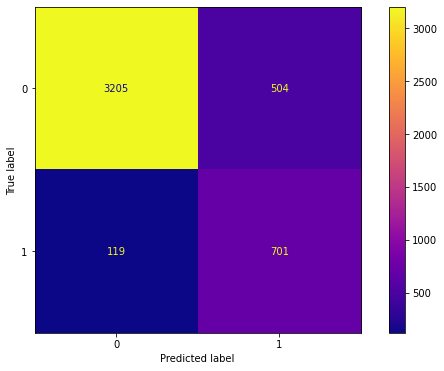

In [106]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [107]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

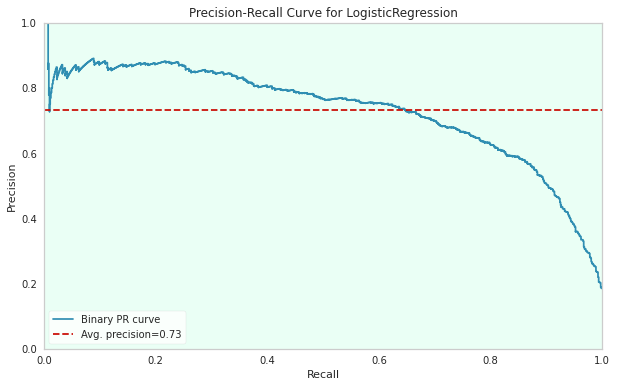

In [108]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      LogisticRegression(C = 0.1, max_iter = 1000, class_weight= "balanced", random_state=101),
      classes = logreg_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [109]:
y_pred = logreg_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [110]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)

viz.score_       :  0.7319915715608737
LogReg_Count_rec :  [0.86411432 0.85487805]
LogReg_Count_f1  :  [0.9114176  0.69234568]
LogReg_Count_AP  :  0.7319915715608737


### CountVectorizer  ***Cross Validation***

In [111]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

 accuracy             score for LogReg_Count : 0.8631301477480641

 precision-0          score for LogReg_Count : 0.9574907322442859

 recall-0             score for LogReg_Count : 0.8715528460013123

 f1-0                 score for LogReg_Count : 0.9124882945468364

 precision-1          score for LogReg_Count : 0.5871789524343317

 recall-1             score for LogReg_Count : 0.8250593075839573

 f1-1                 score for LogReg_Count : 0.6859912618280185



In [112]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

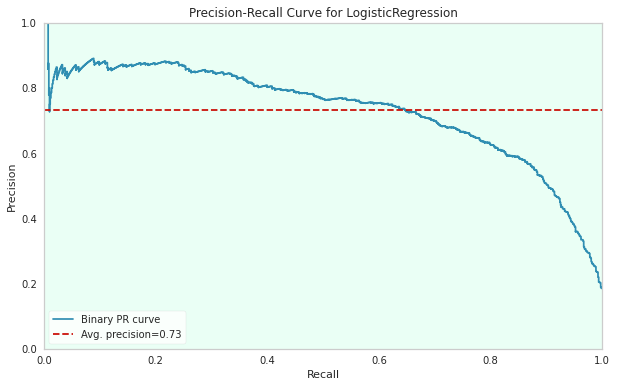

In [113]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [114]:
LogReg_Count_AP = viz.score_
LogReg_Count_AP

0.7319915715608737

### TF-IDF 

In [115]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_TFIDF Model
------------------
[[3192  517]
 [ 108  712]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.84     18112
weighted avg       0.92      0.89      0.90     18112



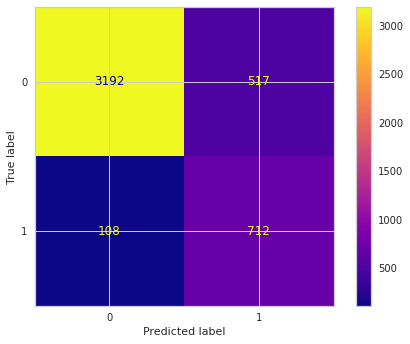

In [116]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

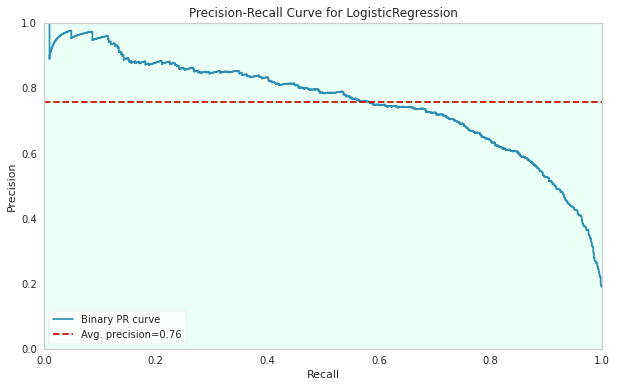

In [117]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state=101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [118]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [119]:
print("viz.score_       : ", viz.score_)
print("LogReg_TFIDF_rec : ", log_tf_idf_rec)
print("LogReg_TFIDF_f1  : ", log_tf_idf_f1)
print("LogReg_TFIDF_AP  : ", log_tf_idf_AP)

viz.score_       :  0.7573148924622259
LogReg_TFIDF_rec :  [0.86060933 0.86829268]
LogReg_TFIDF_f1  :  [0.91082893 0.69497316]
LogReg_TFIDF_AP  :  0.7573148924622259


### TF-IDF ***Cross Validation***

In [120]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")

 accuracy             score for LogReg_TFIDF : 0.8470628657590419

 precision-0          score for LogReg_TFIDF : 0.9638698958309613

 recall-0             score for LogReg_TFIDF : 0.8449191465540273

 f1-0                 score for LogReg_TFIDF : 0.9004703512221497

 precision-1          score for LogReg_TFIDF : 0.5500488825727738

 recall-1             score for LogReg_TFIDF : 0.8567508710801393

 f1-1                 score for LogReg_TFIDF : 0.6699078783140321



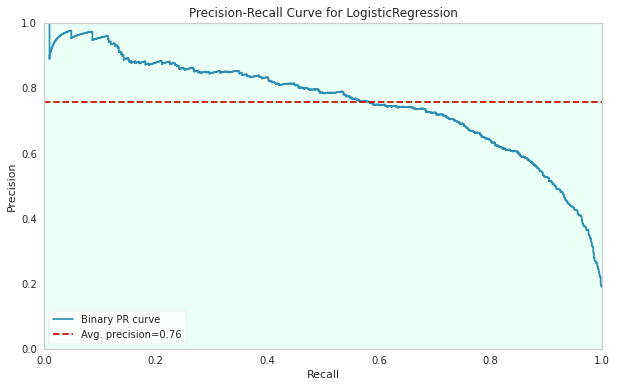

In [121]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced"),
    classes = logreg_tfidf.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [122]:
LogReg_TFIDF_AP = viz.score_
LogReg_TFIDF_AP

0.7573148924622259

## Naive Bayes 

### Countvectorizer ***MultinomialNB***

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

NBMulti_Count Model
-------------------
[[3365  344]
 [ 190  630]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.81      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



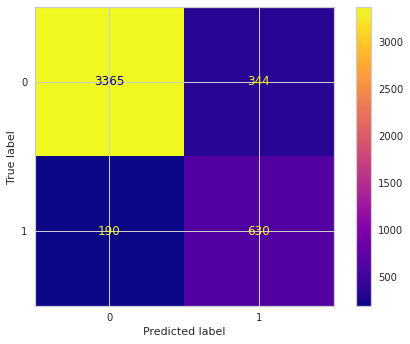

In [125]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)

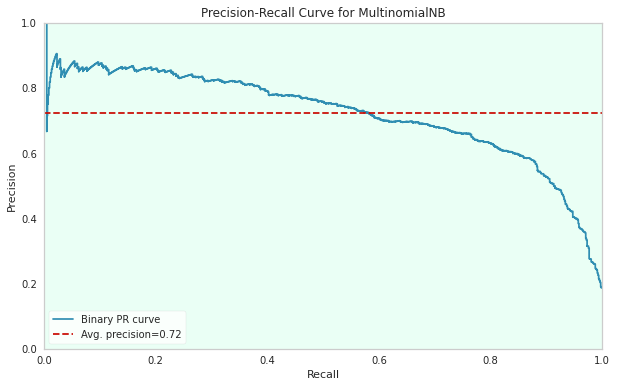

In [126]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [127]:
y_pred = nbmulti_count.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_AP = viz.score_

In [128]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nb_multi_count_rec)
print("NBMulti_Count_f1  : ", nb_multi_count_f1)
print("NBMulti_Count_AP  : ", nb_multi_count_AP)

viz.score_         :  0.7218998753953308
NBMulti_Count_rec :  [0.90725263 0.76829268]
NBMulti_Count_f1  :  [0.92648678 0.70234114]
NBMulti_Count_AP  :  0.7218998753953308


### Countvectorize ***MultinomialNB with Cross Validation***

In [129]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_count_rec = scores
    elif i == "f1-1":
        nbm_count_f1 = scores
    print(f" {i:20} score for NBMulti_Count : {scores}\n")

 accuracy             score for NBMulti_Count : 0.8811839713889732

 precision-0          score for NBMulti_Count : 0.941149630464527

 recall-0             score for NBMulti_Count : 0.9119411279314713

 f1-0                 score for NBMulti_Count : 0.9263033651721688

 precision-1          score for NBMulti_Count : 0.6510779615991329

 recall-1             score for NBMulti_Count : 0.7421482318926532

 f1-1                 score for NBMulti_Count : 0.6935072841065192



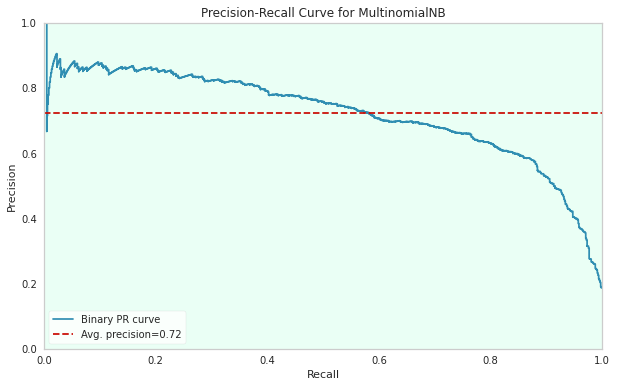

In [130]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes = nbmulti_count.classes_,  
    per_class = True,
    cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [131]:
NBMulti_Count_AP = viz.score_
NBMulti_Count_AP

0.7218998753953308

### Countvectorize ***BernoulliNB***

In [132]:
from sklearn.naive_bayes import BernoulliNB

In [133]:
nbberno_count = BernoulliNB()
nbberno_count.fit(X_train_count,y_train)

BernoulliNB()

NBBerno_Count Model
-------------------
[[3374  335]
 [ 224  596]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.85      0.84     18112
weighted avg       0.90      0.90      0.90     18112



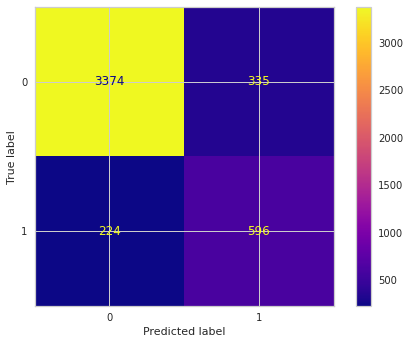

In [134]:
print("NBBerno_Count Model")
print("-------------------")
eval(nbberno_count, X_train_count, X_test_count)

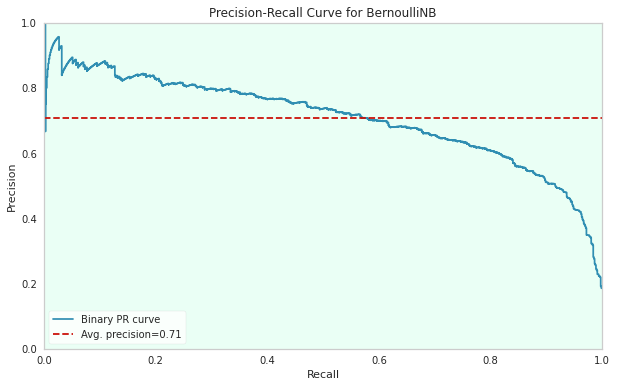

In [135]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [136]:
y_pred = nbberno_count.predict(X_test_count)
nb_ber_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_AP = viz.score_

In [137]:
print("viz.score_        : ", viz.score_)
print("NBBerno_Count_rec : ", nb_ber_count_rec)
print("NBBerno_Count_f1  : ", nb_ber_count_f1)
print("NBBerno_Count_AP  : ", nb_ber_count_AP)

viz.score_        :  0.708190851025224
NBBerno_Count_rec :  [0.90967916 0.72682927]
NBBerno_Count_f1  :  [0.92349802 0.68075385]
NBBerno_Count_AP  :  0.708190851025224


### Countvectorize ***BernoulliNB with Cross Validation***

In [138]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_count_rec = scores
    elif i == "f1-1":
        nbb_count_f1 = scores
    print(f" {i:20} score for NBBerno_Count : {scores}\n")

 accuracy             score for NBBerno_Count : 0.8757730535615682

 precision-0          score for NBBerno_Count : 0.9364588915337636

 recall-0             score for NBBerno_Count : 0.9100533812680279

 f1-0                 score for NBBerno_Count : 0.9230567909399688

 precision-1          score for NBBerno_Count : 0.639577347671856

 recall-1             score for NBBerno_Count : 0.7208114018830157

 f1-1                 score for NBBerno_Count : 0.6776505659547071



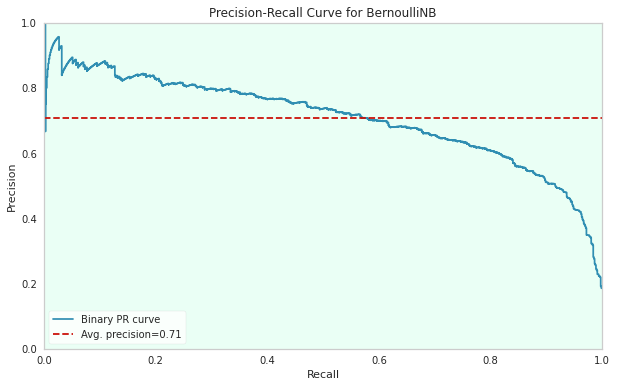

In [139]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [140]:
NBBerno_Count_AP = viz.score_
NBBerno_Count_AP

0.708190851025224

### TF-IDF ***MultinomialNB***

In [141]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL
-------------------
[[3692   17]
 [ 689  131]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3709
           1       0.89      0.16      0.27       820

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14831
           1       0.94      0.23      0.37      3281

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.64     18112
weighted avg       0.87      0.86      0.82     18112



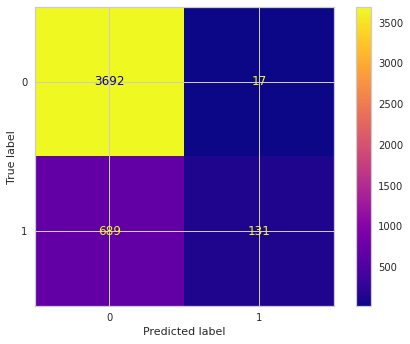

In [142]:
print("NBMulti_TFIDF MODEL")
print("-------------------")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

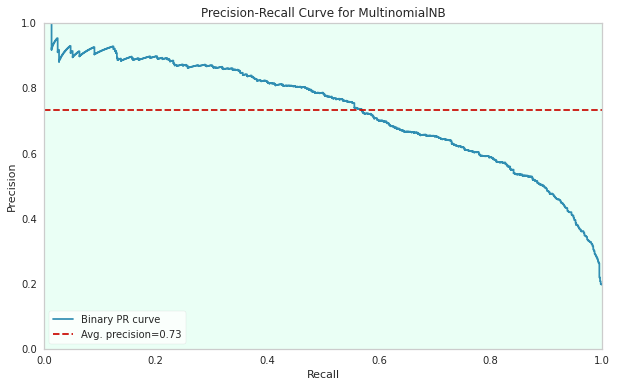

In [143]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [144]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_AP = viz.score_

In [145]:
print("viz.score_        : ", viz.score_)
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.731190252527252
NBMulti_TFIDF_rec :  [0.99541655 0.1597561 ]
NBMulti_TFIDF_f1  :  [0.91273177 0.27066116]
NBMulti_TFIDF_AP  :  0.731190252527252


### TF-IDF ***MultinomialNB with Cross Validation***

In [146]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_tfidf_rec = scores
    elif i == "f1-1":
        nbm_tfidf_f1 = scores
    print(f" {i:20} score for NBMulti_TFIDF : {scores}\n")

 accuracy             score for NBMulti_TFIDF : 0.8446336345341139

 precision-0          score for NBMulti_TFIDF : 0.8427823639843194

 recall-0             score for NBMulti_TFIDF : 0.9960894177134205

 f1-0                 score for NBMulti_TFIDF : 0.9130435330491358

 precision-1          score for NBMulti_TFIDF : 0.8990841691778702

 recall-1             score for NBMulti_TFIDF : 0.1600137148787901

 f1-1                 score for NBMulti_TFIDF : 0.2714375793215772



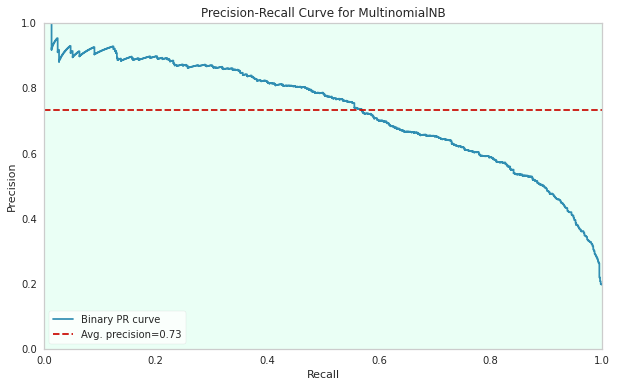

In [147]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [148]:
NBMulti_TFIDF_AP = viz.score_
NBMulti_TFIDF_AP

0.731190252527252

### TF-IDF ***BernoulliNB***

In [149]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NBBerno_TFIDF MODEL
-------------------
[[3374  335]
 [ 224  596]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.85      0.84     18112
weighted avg       0.90      0.90      0.90     18112



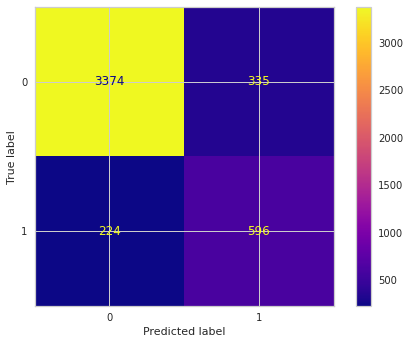

In [150]:
print("NBBerno_TFIDF MODEL")
print("-------------------")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)

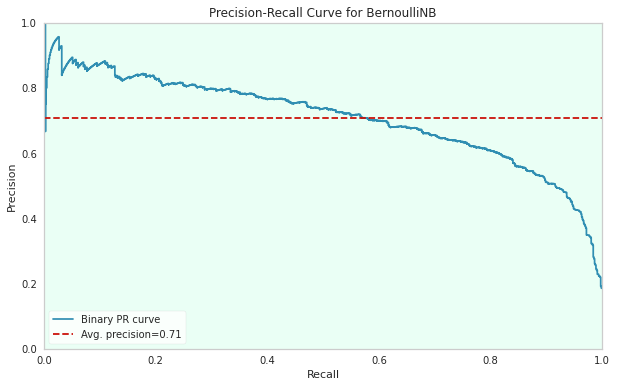

In [151]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [152]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
nb_ber_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_AP = viz.score_

In [153]:
print("viz.score_        : ", viz.score_)
print("NBBerno_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBBerno_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBBerno_TFIDF_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.708190851025224
NBBerno_TFIDF_rec :  [0.99541655 0.1597561 ]
NBBerno_TFIDF_f1  :  [0.91273177 0.27066116]
NBBerno_TFIDF_AP  :  0.731190252527252


### TF-IDF ***BernoulliNB with Cross Validation***

In [154]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_tfidf_rec = scores
    elif i == "f1-1":
        nbb_tfidf_f1 = scores
    print(f" {i:20} score for NBBerno_TFIDF : {scores}\n")

 accuracy             score for NBBerno_TFIDF : 0.8757730535615682

 precision-0          score for NBBerno_TFIDF : 0.9364588915337636

 recall-0             score for NBBerno_TFIDF : 0.9100533812680279

 f1-0                 score for NBBerno_TFIDF : 0.9230567909399688

 precision-1          score for NBBerno_TFIDF : 0.639577347671856

 recall-1             score for NBBerno_TFIDF : 0.7208114018830157

 f1-1                 score for NBBerno_TFIDF : 0.6776505659547071



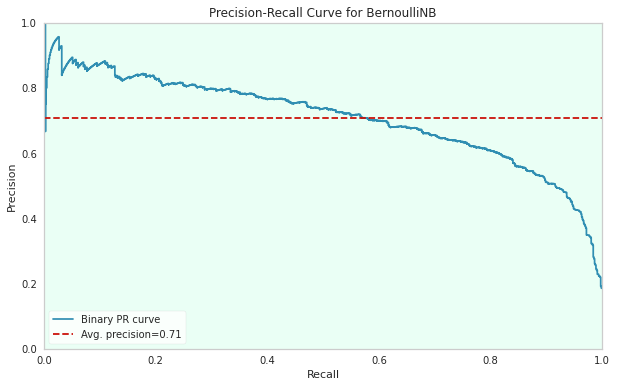

In [155]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [156]:
NBBerno_TFIDF_AP = viz.score_
NBBerno_TFIDF_AP

0.708190851025224

## Support Vector Machine (SVM)

### Countvectorizer

In [157]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_Count Model
---------------
[[3198  511]
 [ 115  705]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



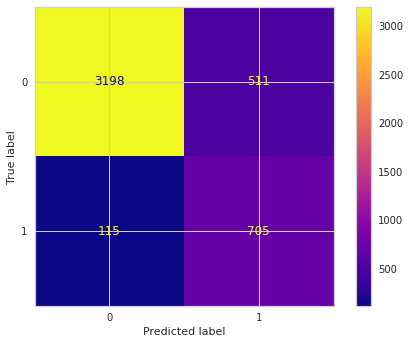

In [158]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

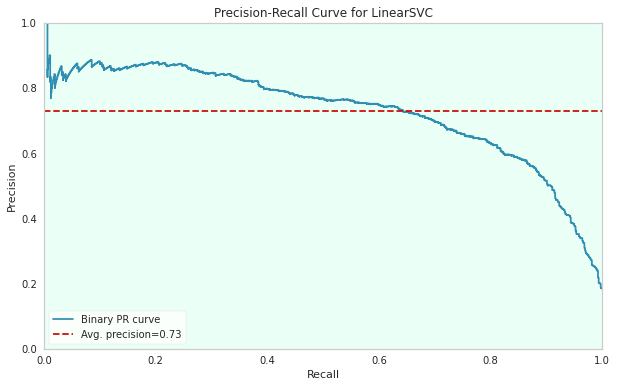

In [159]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [160]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_AP = viz.score_

In [161]:
print("viz.score_    : ", viz.score_)
print("SVC_Count_rec : ", svc_count_rec)
print("SVC_Count_f1  : ", svc_count_f1)
print("SVC_Count_AP  : ", svc_count_AP)

viz.score_    :  0.7296565955771601
SVC_Count_rec :  [0.86222702 0.8597561 ]
SVC_Count_f1  :  [0.91085161 0.69253438]
SVC_Count_AP  :  0.7296565955771601


### CountVectorizer ***With Cross Validation***

In [162]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

 accuracy             score for SVC_Count : 0.8634062383057669

 precision-0          score for SVC_Count : 0.9579920073525449

 recall-0             score for SVC_Count : 0.8714180751118246

 f1-0                 score for SVC_Count : 0.9126401435862357

 precision-1          score for SVC_Count : 0.5874965150102482

 recall-1             score for SVC_Count : 0.8271934539254205

 f1-1                 score for SVC_Count : 0.6869338702325819



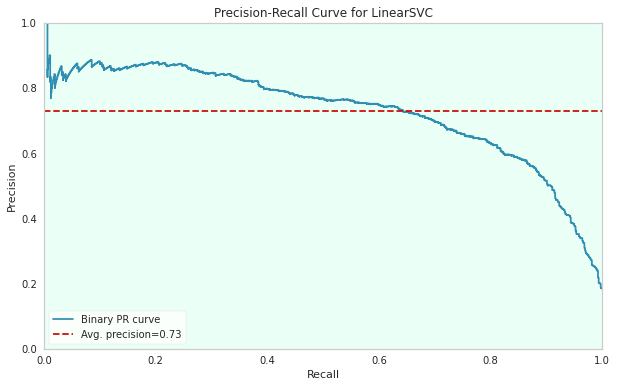

In [163]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [164]:
SVC_Count_AP = viz.score_
SVC_Count_AP

0.7296565955771601

### TD-IDF

In [165]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_TFIDF Model
---------------
[[3112  597]
 [ 108  712]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.87      0.67       820

    accuracy                           0.84      4529
   macro avg       0.76      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.56      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



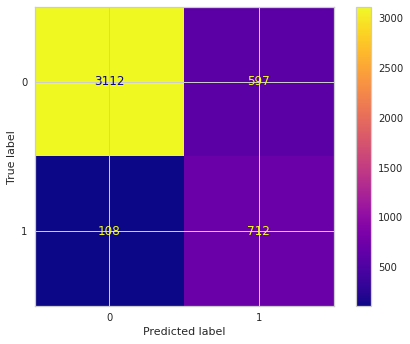

In [166]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

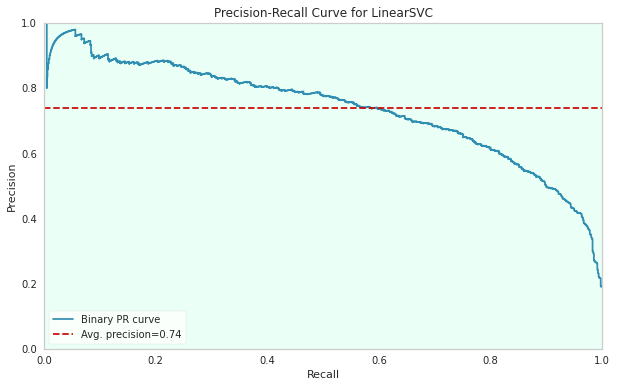

In [167]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [168]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_AP = viz.score_

In [169]:
print("viz.score_     : ", viz.score_)
print("SVC_TFIDF_rec   : ", svc_tf_idf_rec)
print("SVC_TFIDF_f1   : ", svc_tf_idf_f1)
print("SVC_TFIDF_AP   : ", svc_tf_idf_AP)

viz.score_     :  0.7381599158786752
SVC_TFIDF_rec   :  [0.83904017 0.86829268]
SVC_TFIDF_f1   :  [0.89825372 0.66885862]
SVC_TFIDF_AP   :  0.7381599158786752


### TFIDF ***With Cross Validation***

In [170]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

 accuracy             score for SVC_TFIDF : 0.8452408204460597

 precision-0          score for SVC_TFIDF : 0.9645620792704502

 recall-0             score for SVC_TFIDF : 0.8419522785640675

 f1-0                 score for SVC_TFIDF : 0.8990843216075806

 precision-1          score for SVC_TFIDF : 0.5463317778833097

 recall-1             score for SVC_TFIDF : 0.8601045296167248

 f1-1                 score for SVC_TFIDF : 0.6681636568172312



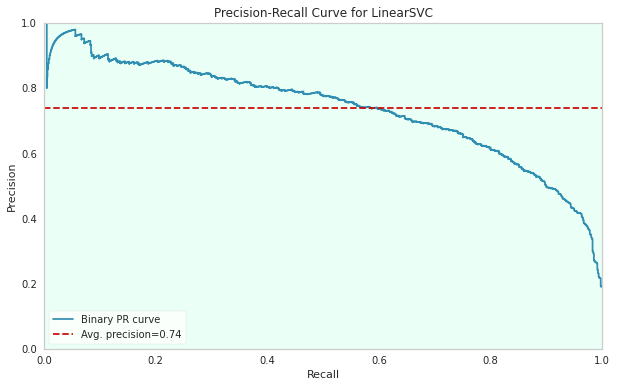

In [171]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [172]:
SVC_TFIDF_AP = viz.score_
SVC_TFIDF_AP

0.7381599158786752

## Random Forest

### CountVectorizer

In [173]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_Count Model
--------------
[[3150  559]
 [ 160  660]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.80      0.65       820

    accuracy                           0.84      4529
   macro avg       0.75      0.83      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.61      0.89      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.88      0.88     18112



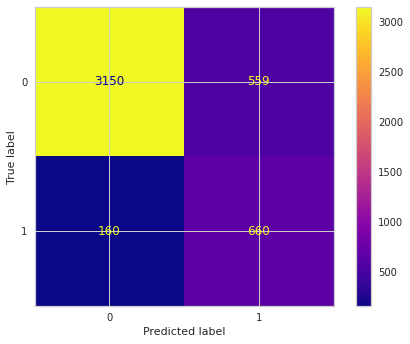

In [174]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

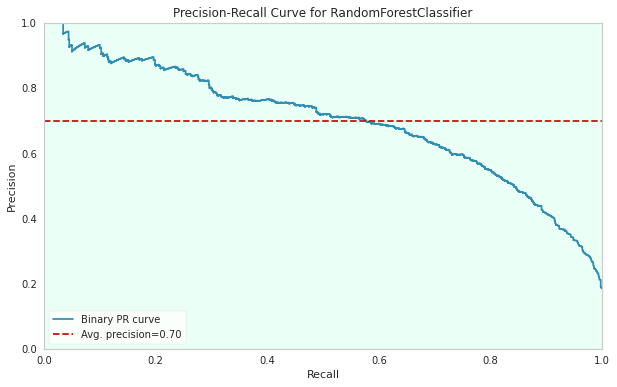

In [175]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [176]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_AP = viz.score_

In [177]:
print("viz.score_   : ", viz.score_)
print("RF_Count_rec : ", rf_count_rec)
print("RF_Count_f1  : ", rf_count_f1)
print("RF_Count_AP  : ", rf_count_AP)

viz.score_   :  0.6979704537517775
RF_Count_rec :  [0.84928552 0.80487805]
RF_Count_f1  :  [0.89756376 0.64737616]
RF_Count_AP  :  0.6979704537517775


### CountVectorizer with Cross Validation

In [178]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for RF_Count : {scores}\n")

 accuracy             score for RF_Count : 0.8418172670569722

 precision-0          score for RF_Count : 0.9494603836665207

 recall-0             score for RF_Count : 0.8522013184464361

 f1-0                 score for RF_Count : 0.8981795141654763

 precision-1          score for RF_Count : 0.5436481771271273

 recall-1             score for RF_Count : 0.7948819408406851

 f1-1                 score for RF_Count : 0.6455483976321895



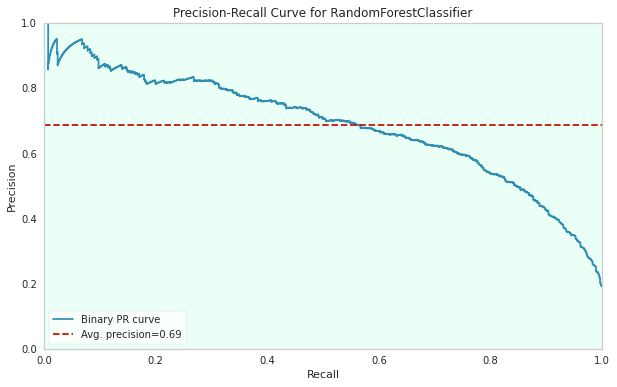

In [179]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [180]:
RF_Count_AP = viz.score_
RF_Count_AP

0.6869039030557007

### TF-IDF

In [181]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_TFIDF Model
--------------
[[3099  610]
 [ 158  662]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.52      0.81      0.63       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.60      0.91      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



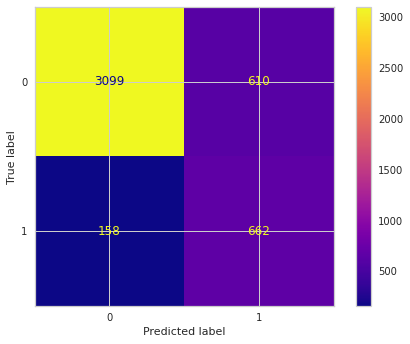

In [182]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

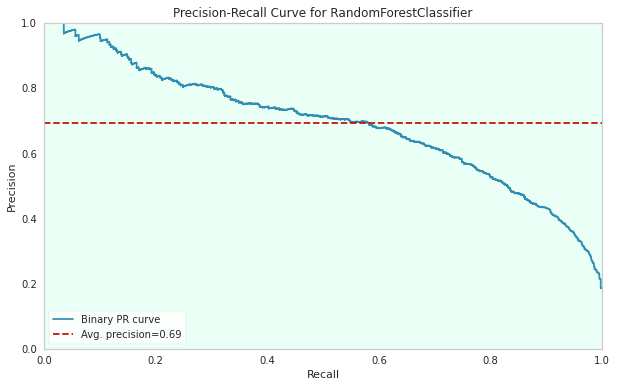

In [183]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [184]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_AP = viz.score_

In [185]:
print("viz.score_   : ", viz.score_)
print("RF_TFIDF_rec : ", rf_tf_idf_rec)
print("RF_TFIDF_f1  : ", rf_tf_idf_f1)
print("RF_TFIDF_AP  : ", rf_tf_idf_AP)

viz.score_   :  0.6916792535424405
RF_TFIDF_rec :  [0.83553518 0.80731707]
RF_TFIDF_f1  :  [0.88975022 0.63288719]
RF_TFIDF_AP  :  0.6916792535424405


### TF-IDF with Cross Validation

In [186]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

 accuracy             score for RF_TFIDF : 0.8351920688263895

 precision-0          score for RF_TFIDF : 0.9462008788979521

 recall-0             score for RF_TFIDF : 0.8469422548087671

 f1-0                 score for RF_TFIDF : 0.8937967823417645

 precision-1          score for RF_TFIDF : 0.5306188565486745

 recall-1             score for RF_TFIDF : 0.7820826228779005

 f1-1                 score for RF_TFIDF : 0.6321253812301684



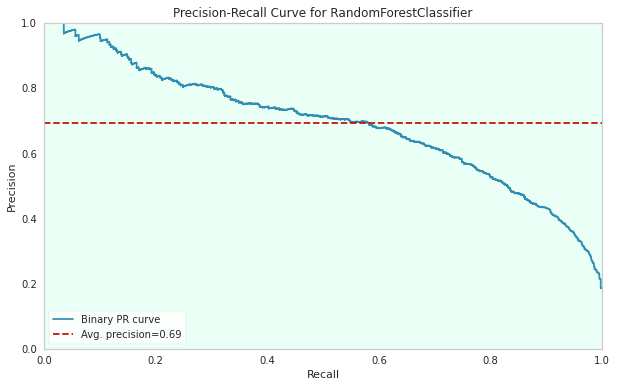

In [187]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [188]:
RF_TFIDF_AP = viz.score_
RF_TFIDF_AP

0.6916792535424405

## Ada Boosting

### CountVectorizer

In [189]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_Count Model
---------------
[[3496  213]
 [ 343  477]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.58      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14831
           1       0.80      0.66      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.87      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



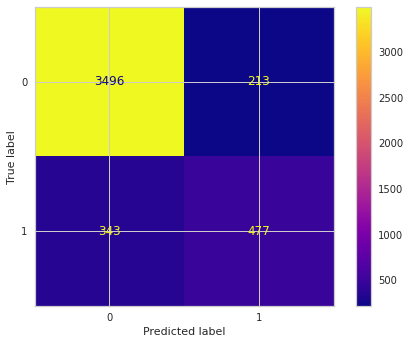

In [190]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

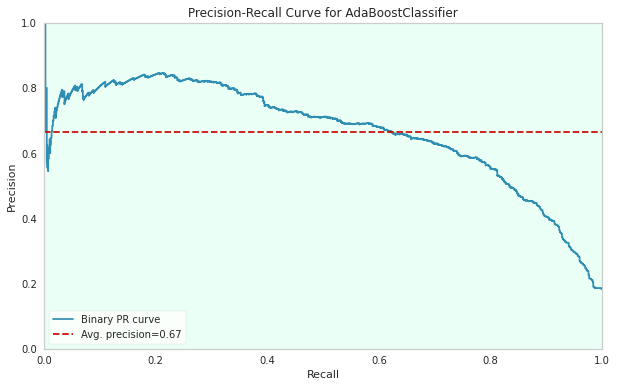

In [191]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [192]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_AP = viz.score_

In [193]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_count_rec)
print("Ada_Count_f1  : ", ada_count_f1)
print("Ada_Count_AP  : ", ada_count_AP)

viz.score_    :  0.6658723385326962
Ada_Count_rec :  [0.94257212 0.58170732]
Ada_Count_f1  :  [0.9263381  0.63178808]
Ada_Count_AP  :  0.6658723385326962


### CountVectorizer with Cross Validation

In [194]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

 accuracy             score for Ada_Count : 0.8770434358098596

 precision-0          score for Ada_Count : 0.9084372536112625

 recall-0             score for Ada_Count : 0.9451151686771733

 f1-0                 score for Ada_Count : 0.9264047117777524

 precision-1          score for Ada_Count : 0.6968693764698621

 recall-1             score for Ada_Count : 0.569341685818074

 f1-1                 score for Ada_Count : 0.6264905668543375



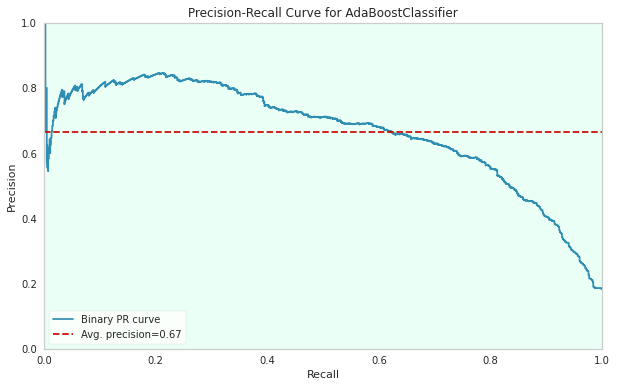

In [195]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [196]:
Ada_Count_AP = viz.score_
Ada_Count_AP

0.6658723385326962

### TF-IDF

In [197]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
---------------
[[3469  240]
 [ 339  481]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3709
           1       0.67      0.59      0.62       820

    accuracy                           0.87      4529
   macro avg       0.79      0.76      0.77      4529
weighted avg       0.87      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.83      0.71      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



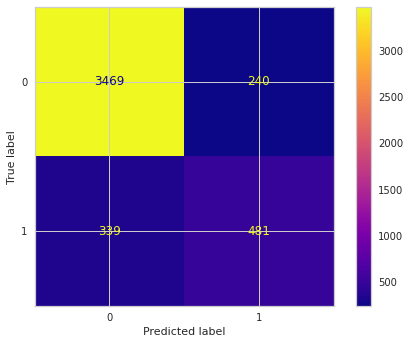

In [198]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

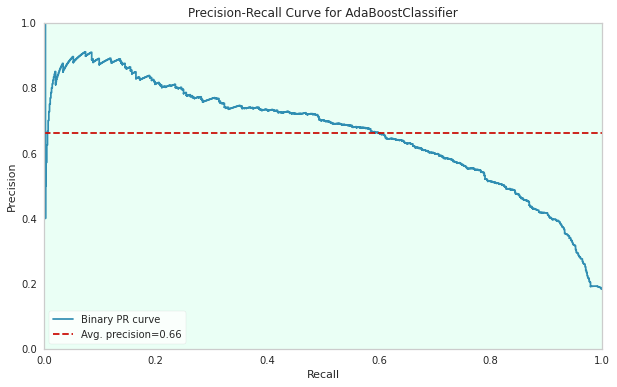

In [199]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [200]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_AP = viz.score_

In [201]:
print("viz.score_    : ", viz.score_)
print("Ada_TFIDF_rec : ", ada_tf_idf_rec)
print("Ada_TFIDF_f1  : ", ada_tf_idf_f1)
print("Ada_TFIDF_AP  : ", ada_tf_idf_AP)

viz.score_    :  0.6619496098127149
Ada_TFIDF_rec :  [0.93529253 0.58658537]
Ada_TFIDF_f1  :  [0.92297459 0.62426995]
Ada_TFIDF_AP  :  0.6619496098127149


### TF-IDF with Cross Validation

In [202]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

 accuracy             score for Ada_TFIDF : 0.8747795541838386

 precision-0          score for Ada_TFIDF : 0.9077327627976034

 recall-0             score for Ada_TFIDF : 0.9429575167259487

 f1-0                 score for Ada_TFIDF : 0.9249896387471932

 precision-1          score for Ada_TFIDF : 0.6880423433746232

 recall-1             score for Ada_TFIDF : 0.5665977833790496

 f1-1                 score for Ada_TFIDF : 0.6210023594300226



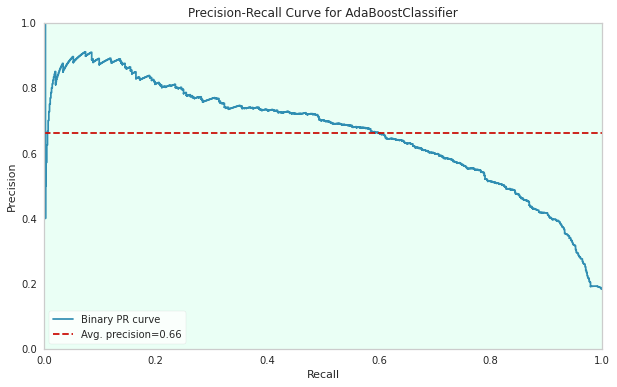

In [203]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [204]:
Ada_TFIDF_AP = viz.score_
Ada_TFIDF_AP

0.6619496098127149

## Modelling with Deep Learning

In [205]:
# df_dl = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
# df_dl.head()

In [206]:
df_dl = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [207]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [208]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)

In [209]:
df_dl.shape

(23486, 2)

In [210]:
df_dl.isnull().sum()

text         845
recommend      0
dtype: int64

In [211]:
df_dl = df_dl.dropna(subset = ['text'], axis = 0)
df_dl = df_dl.reset_index(drop = True)

In [212]:
df_dl.isnull().sum()

text         0
recommend    0
dtype: int64

In [213]:
df_dl.shape

(22641, 2)

In [214]:
df_dl.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

### Tokenization

In [216]:
X = df_dl['text'].values
y = df_dl['recommend'].map({0:1, 1:0}).values

In [217]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words)

In [218]:
tokenizer.fit_on_texts(X)

### Creating word index

In [219]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [220]:
len(tokenizer.word_index)

14847

In [221]:
len(tokenizer.word_index.keys())

14847

### Converting tokens to numeric

In [222]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [223]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [224]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [225]:
num_tokens.max()

116

In [226]:
num_tokens.mean()

60.39287133960514

In [227]:
num_tokens.argmax()

16263

In [228]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [229]:
num_tokens.argmin()

820

In [230]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [231]:
max_tokens = 103

In [232]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [233]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [234]:
X_pad.shape

(22641, 103)

### Train Set Split

In [235]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state = 101)

### Modeling

In [237]:
model = Sequential()

2021-11-20 12:56:58.563572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 12:56:58.564768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 12:56:58.565449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 12:56:58.566358: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [238]:
embedding_size = 100

In [239]:
model.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens,
                    name = 'embedding_layer'))

In [240]:
model.add(Bidirectional(GRU(units = 48, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 24, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 12)))
model.add(Dense(1, activation = 'sigmoid'))

In [241]:
optimizer = Adam(lr = 0.004)

In [242]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ["Recall"])

In [243]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 103, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 103, 96)           43200     
_________________________________________________________________
dropout (Dropout)            (None, 103, 96)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 103, 48)           17568     
_________________________________________________________________
dropout_1 (Dropout)          (None, 103, 48)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24)                4464      
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [244]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", 
                           verbose = 1, patience = 5, restore_best_weights = True)

In [245]:
pd.Series(y_train).value_counts(normalize = True) 

0   0.819
1   0.181
dtype: float64

In [246]:
weights = {0:19, 1:81}

In [247]:
model.fit(X_train, y_train, epochs = 25, batch_size = 256, class_weight = weights,
         validation_data = (X_test, y_test), callbacks = [early_stop])

2021-11-20 12:57:17.936009: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2021-11-20 12:57:25.800466: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


71/71 [==============================] - 14s 65ms/step - loss: 14.3921 - recall: 0.7607 - val_loss: 0.3456 - val_recall: 0.8073
Epoch 2/25
71/71 [==============================] - 3s 43ms/step - loss: 8.1981 - recall: 0.9156 - val_loss: 0.3303 - val_recall: 0.7915
Epoch 3/25
71/71 [==============================] - 3s 43ms/step - loss: 6.6187 - recall: 0.9418 - val_loss: 0.3146 - val_recall: 0.7707
Epoch 4/25
71/71 [==============================] - 3s 46ms/step - loss: 5.0289 - recall: 0.9592 - val_loss: 0.4119 - val_recall: 0.8354
Epoch 5/25
71/71 [==============================] - 3s 42ms/step - loss: 3.6806 - recall: 0.9796 - val_loss: 0.3829 - val_recall: 0.7488
Epoch 6/25
71/71 [==============================] - 3s 43ms/step - loss: 3.0718 - recall: 0.9805 - val_loss: 0.4881 - val_recall: 0.8000
Epoch 7/25
71/71 [==============================] - 3s 46ms/step - loss: 2.6840 - recall: 0.9842 - val_loss: 0.4748 - val_recall: 0.7305
Epoch 8/25
71/71 [==============================] 

### Model evaluation

In [248]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 14.392   0.761     0.346       0.807
1  8.198   0.916     0.330       0.791
2  6.619   0.942     0.315       0.771
3  5.029   0.959     0.412       0.835
4  3.681   0.980     0.383       0.749

<AxesSubplot:>

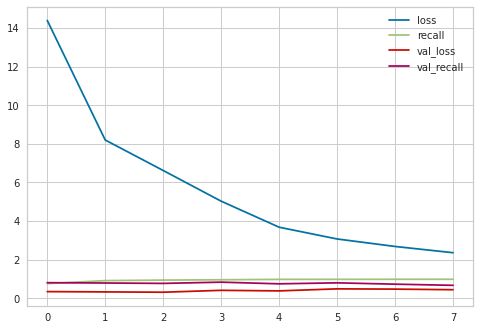

In [249]:
model_loss.plot()

In [250]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 9s 13ms/step - loss: 0.1449 - recall: 0.9662


[0.14485609531402588, 0.9661688804626465]

In [251]:
model.evaluate(X_test, y_test) 

142/142 [==============================] - 2s 11ms/step - loss: 0.3146 - recall: 0.7707


[0.3145849108695984, 0.7707316875457764]

In [252]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[14026   805]
 [  111  3170]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     14831
           1       0.80      0.97      0.87      3281

    accuracy                           0.95     18112
   macro avg       0.89      0.96      0.92     18112
weighted avg       0.96      0.95      0.95     18112



In [253]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------")
print(classification_report(y_test, y_pred))

[[3343  366]
 [ 188  632]]
--------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3709
           1       0.63      0.77      0.70       820

    accuracy                           0.88      4529
   macro avg       0.79      0.84      0.81      4529
weighted avg       0.89      0.88      0.88      4529



In [254]:
from sklearn.metrics import precision_recall_curve, average_precision_score

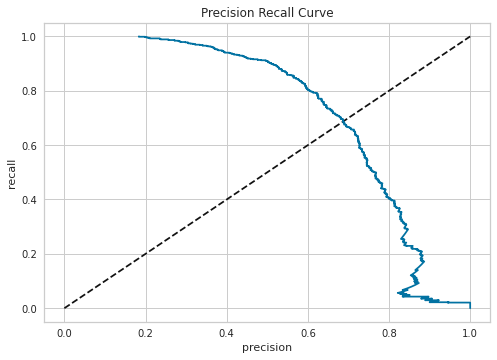

In [255]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [256]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [257]:
print("DL_AP   : ", DL_AP)
print("DL_f1   : ", DL_f1)
print("DL_rec  : ", DL_rec)

DL_AP   :  0.7254160953326471
DL_f1   :  0.6952695269526953
DL_rec  :  0.7707317073170732


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [258]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Multi)_Count", "NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count", 
                                  "Random Forest_Count", "AdaBoost_Count", "NaiveBayes(Multi)_TFIDF", 
                                  "NaiveBayes(Berno)_TFIDF", "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF", 
                                  "AdaBoost_TFIDF", "DL"],
                        
                        "F1_Score": [nbm_count_f1, nbb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
                                    nbm_tfidf_f1, nbb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                                                 
                        "Recall_Score": [nbm_count_rec, nbb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, 
                                         ada_count_rec, nbm_tfidf_rec, nbb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                         rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [NBMulti_Count_AP, NBBerno_Count_AP, LogReg_Count_AP, SVC_Count_AP, 
                                                    RF_Count_AP, Ada_Count_AP, NBMulti_TFIDF_AP, NBBerno_TFIDF_AP,
                                                    LogReg_TFIDF_AP, SVC_TFIDF_AP, RF_TFIDF_AP, Ada_TFIDF_AP, DL_AP]})
  
    
compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Average_Precision_Score", ascending=True)
fig = px.bar(compare, x = "Average_Precision_Score", y = "Model", title = "Average_Precision_Score")
fig.show()

## Prediction

In [259]:
review1 = "I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee."
review2 = "Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top."
review3 = "Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans"
review4 = "Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie."
review5 = "I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design."
review6 = "Nice shirt seems well made. good just not a great fit for me."
review7 = "I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation."
review8 = "This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans."
review9 = "Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return"
review10 = "A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking."

reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10]

In [260]:
tokens = tokenizer.texts_to_sequences(reviews) 

In [261]:
tokens_pad = pad_sequences(tokens, maxlen = max_tokens)
tokens_pad.shape

(10, 103)

In [262]:
mod_pred = model.predict(tokens_pad)

In [263]:
mod_pred

array([[0.03270187],
       [0.9619492 ],
       [0.01509156],
       [0.3384304 ],
       [0.01937586],
       [0.3482724 ],
       [0.7530367 ],
       [0.01461606],
       [0.9496458 ],
       [0.96935576]], dtype=float32)

In [264]:
df_pred = pd.DataFrame(mod_pred, index = reviews)
df_pred.rename(columns = {0:'Pred_Proba'}, inplace = True)

In [265]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Not Recommended" if x >= 0.5 else "Recommended")

In [266]:
df_pred

Pred_Proba  \
I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee.                                                          0.033   
Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top.                    0.962   
Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans                                                     0.015   
Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie.                                                      0.338   
I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design.       0.019   
Nice shirt seems well made. good just not a great fit for me.                                                                                            0.348   
I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation.                            0.753   
This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans.                                           0.015   
Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return                                               0.950   
A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking.               0.969   

                                                                                                                                                   Predicted_Feedbaack  
I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee.                                                            Recommended  
Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top.                  Not Recommended  
Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans                                                       Recommended  
Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie.                                                        Recommended  
I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design.         Recommended  
Nice shirt seems well made. good just not a great fit for me.                                                                                              Recommended  
I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation.                          Not Recommended  
This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans.                                             Recommended  
Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return                                             Not Recommended  
A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking.             Not Recommended

### Conclusion

- In this project we have used sentiment analysis to determine whether the product is recommended or not. We have built models with five different machine learning algorithms and also with deep learning algorithm and compare their performance. Thus, we have determined the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

- When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the Logistic Regression model stands out. 

- Thank you in advance for your constructive and instructive comments.